In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('preprocessed_water_quality.csv')

# BIRCH Clustering


Clustering Metrics:
Silhouette Score: 0.539
Calinski-Harabasz Index: 135410.552
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    7907
1    5216
2    7138
3    4960
4    3281
Name: count, dtype: int64


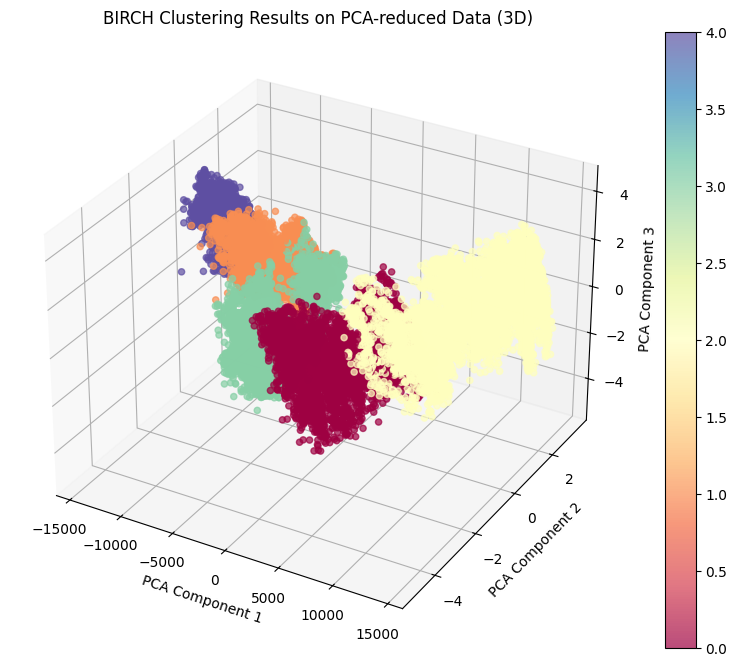

In [4]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Apply PCA to reduce data to 3D for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create BIRCH clustering model
birch = Birch(n_clusters=5)  # Adjust clusters as needed

# Fit and predict clusters
clusters = birch.fit_predict(df)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Calculate clustering evaluation metrics
silhouette = silhouette_score(df, clusters)
calinski = calinski_harabasz_score(df, clusters)
davies = davies_bouldin_score(df, clusters)

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print basic clustering information
print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PCA-reduced data
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                      c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('BIRCH Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()


## Hyperparameter Tuning

In [5]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
from itertools import product

# Define hyperparameter grid
threshold_values = np.linspace(0.1, 1.0, 10)
branching_factors = [25, 50, 100, 200]
n_clusters_options = [3, 5, 7]  # Avoid None to prevent excessive clusters

best_params = None
best_silhouette = -1
best_model = None
best_clusters = None

# Perform grid search over hyperparameters
for threshold, branching_factor, n_clusters in product(threshold_values, branching_factors, n_clusters_options):
    birch = Birch(threshold=threshold, branching_factor=branching_factor, n_clusters=n_clusters)
    clusters = birch.fit_predict(df)
    
    # Ensure valid clustering before evaluating
    n_labels = len(set(clusters))
    if 2 <= n_labels <= 50:  # Set an upper limit to avoid excessive clusters
        silhouette = silhouette_score(df, clusters)
        
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_params = {'threshold': threshold, 'branching_factor': branching_factor, 'n_clusters': n_clusters}
            best_model = birch
            best_clusters = clusters

# Apply best model
df['Cluster'] = best_clusters

# Re-evaluate clustering metrics
calinski = calinski_harabasz_score(df, best_clusters)
davies = davies_bouldin_score(df, best_clusters)

print("\nBest BIRCH Parameters:")
print(best_params)
print("\nClustering Metrics with Best Parameters:")
print(f"Silhouette Score: {best_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

# Print number of clusters and their distribution
print(f"\nNumber of clusters found: {len(set(best_clusters))}")
print("\nCluster distribution:")
print(pd.Series(best_clusters).value_counts().sort_index())


Best BIRCH Parameters:
{'threshold': 1.0, 'branching_factor': 25, 'n_clusters': 3}

Clustering Metrics with Best Parameters:
Silhouette Score: 0.589
Calinski-Harabasz Index: 113053.132
Davies-Bouldin Index: 0.500

Number of clusters found: 3

Cluster distribution:
0    10009
1     9624
2     8869
Name: count, dtype: int64


## bootstrapping

# Fuzzy C-Means


Clustering Metrics:
Silhouette Score: 0.560
Calinski-Harabasz Index: 170336.920
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    5845
1    5845
2    5458
3    5458
4    5896
Name: count, dtype: int64


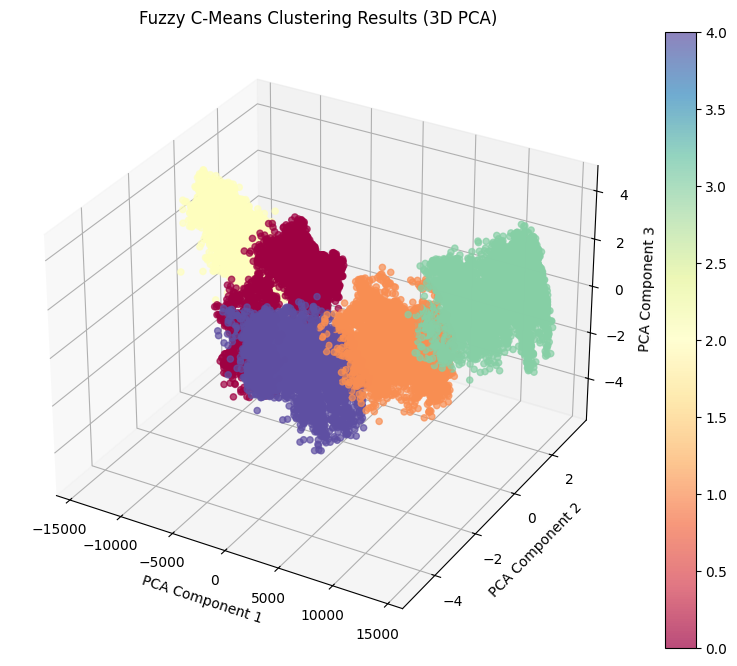

In [6]:
from fcmeans import FCM
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- Fuzzy C-Means Clustering ---
n_clusters = 5
fcm = FCM(n_clusters=n_clusters, random_state=42)
fcm.fit(df.values)

# Predict cluster labels
clusters = fcm.predict(df.values)
df['Cluster'] = clusters

# --- Evaluation Metrics (Optional: Fuzzy labels can cause small inconsistency) ---
if len(np.unique(clusters)) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1), clusters)
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1), clusters)
    davies = davies_bouldin_score(df.drop('Cluster', axis=1), clusters)
    print("\nClustering Metrics:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Cluster Info ---
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('Fuzzy C-Means Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# GMM


Clustering Metrics:
Silhouette Score: 0.560
Calinski-Harabasz Index: 170336.920
Davies-Bouldin Index: 0.500

Number of clusters: 5

Cluster distribution:
0    5896
1    5458
2    5458
3    5845
4    5845
Name: count, dtype: int64


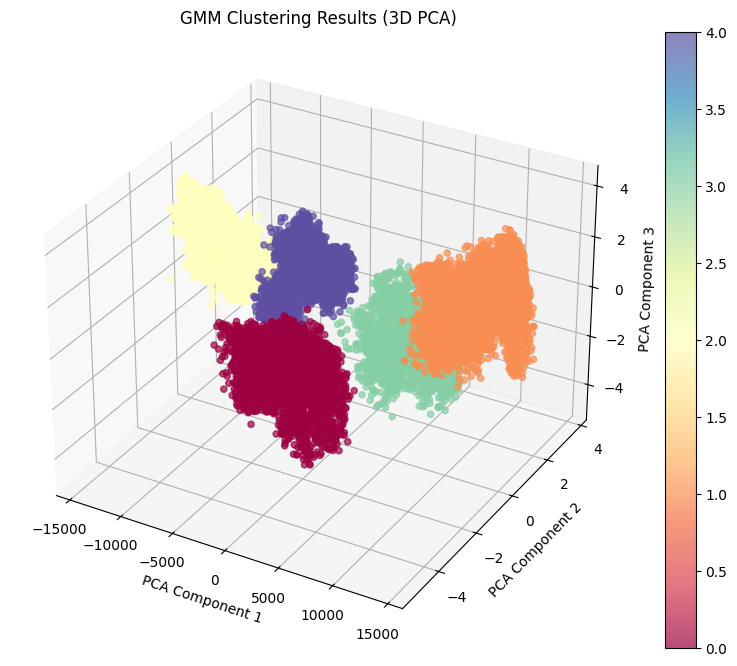

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- GMM Clustering ---
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(df.values)

# Predict cluster labels
clusters = gmm.predict(df.values)
df['Cluster'] = clusters

# --- Evaluation Metrics ---
if len(np.unique(clusters)) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1), clusters)
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1), clusters)
    davies = davies_bouldin_score(df.drop('Cluster', axis=1), clusters)
    print("\nClustering Metrics:")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Cluster Info ---
print(f"\nNumber of clusters: {n_clusters}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('GMM Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()

# K-Meioids


Clustering Metrics (K-Medoids):
Silhouette Score: 0.268
Calinski-Harabasz Index: 9109.605
Davies-Bouldin Index: 1.624

Number of clusters: 5

Cluster distribution:
0    10845
1     4308
2     4223
3     5457
4     3669
Name: count, dtype: int64


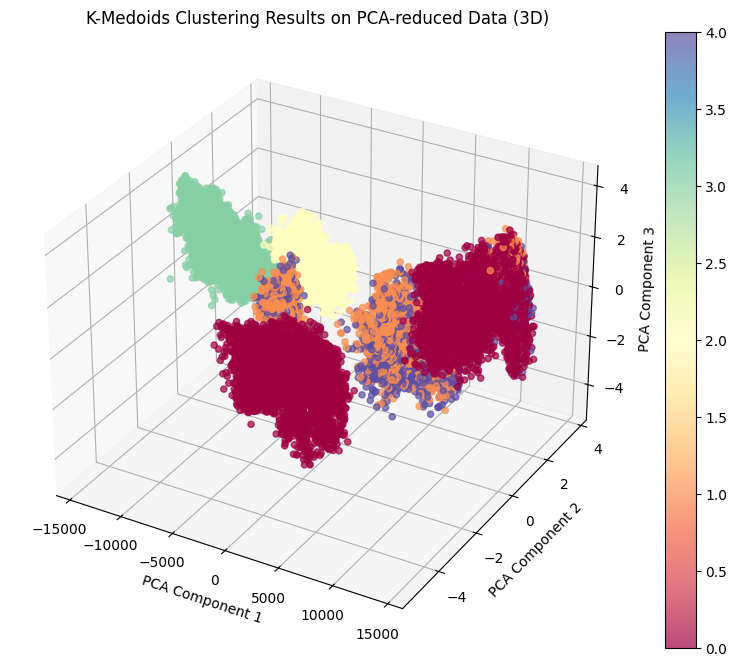

In [8]:
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==============================
# Step 1: Apply PCA for Visualization
# ==============================
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# ==============================
# Step 2: Normalize Data
# ==============================
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ==============================
# Step 3: Apply K-Medoids Clustering
# ==============================
n_clusters = 5  # Adjust the number of clusters as needed

kmedoids = KMedoids(n_clusters=n_clusters, metric="euclidean", random_state=42)
clusters = kmedoids.fit_predict(df_scaled)

df['Cluster'] = clusters  # Store the cluster labels in the DataFrame

# ==============================
# Step 4: Evaluate Clustering
# ==============================
silhouette = silhouette_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)
davies = davies_bouldin_score(df_scaled, clusters)

print("\nClustering Metrics (K-Medoids):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# ==============================
# Step 5: 3D Visualization
# ==============================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('K-Medoids Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()


# OPTICS


Clustering Metrics (excluding noise points):
Silhouette Score: 0.813
Calinski-Harabasz Index: 113896.928
Davies-Bouldin Index: 0.236

Number of clusters found: 2
Number of noise points: 14460

Cluster distribution:
-1    14460
 0     9667
 1     4375
Name: count, dtype: int64


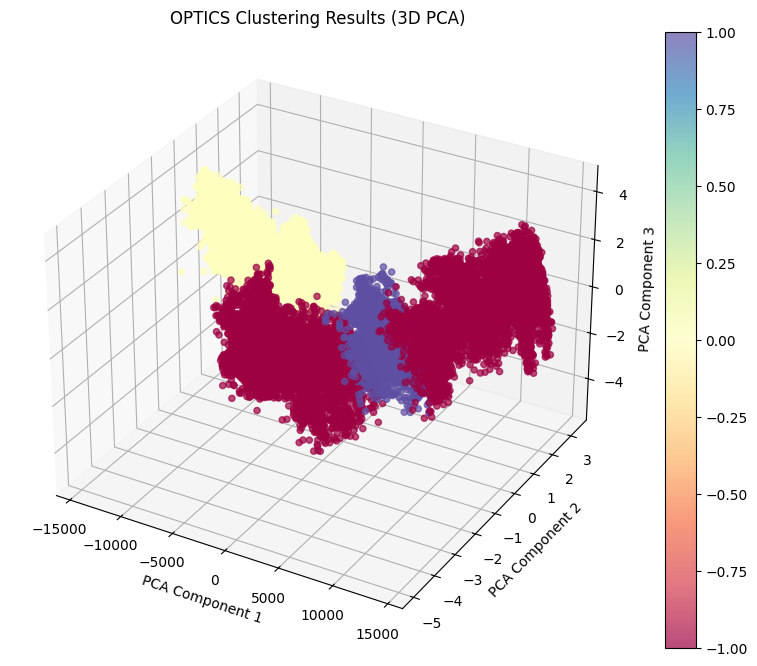

In [13]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PCA Dimensionality Reduction to 3 Components ---
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# --- OPTICS Clustering ---
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.1) 
clusters = optics.fit_predict(df)

# --- Add cluster labels ---
df['Cluster'] = clusters

# --- Calculate Clustering Metrics (excluding noise points) ---
mask = clusters != -1
if len(np.unique(clusters[mask])) > 1:
    silhouette = silhouette_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    calinski = calinski_harabasz_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    davies = davies_bouldin_score(df.drop('Cluster', axis=1)[mask], clusters[mask])
    print("\nClustering Metrics (excluding noise points):")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Basic Cluster Information ---
print(f"\nNumber of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of noise points: {list(clusters).count(-1)}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('OPTICS Clustering Results (3D PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()


## Hyperparameter Tuning

In [10]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

# --- Hyperparameter Tuning for OPTICS ---
best_score = -1
best_params = {}
best_clusters = None

param_grid = {
    "min_samples": [5, 10, 20],
    "xi": [0.01, 0.05, 0.1],
    "min_cluster_size": [0.05, 0.1, 0.2]
}

for min_samples in param_grid["min_samples"]:
    for xi in param_grid["xi"]:
        for min_cluster_size in param_grid["min_cluster_size"]:
            optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
            clusters = optics.fit_predict(df)
            
            # Exclude noise points
            mask = clusters != -1
            if len(np.unique(clusters[mask])) > 1:
                silhouette = silhouette_score(df[mask], clusters[mask])
                calinski = calinski_harabasz_score(df[mask], clusters[mask])
                davies = davies_bouldin_score(df[mask], clusters[mask])
                
                score = silhouette  # Prioritizing silhouette score for best clustering
                if score > best_score:
                    best_score = score
                    best_params = {"min_samples": min_samples, "xi": xi, "min_cluster_size": min_cluster_size}
                    best_clusters = clusters

# --- Apply Best OPTICS Model ---
optics = OPTICS(**best_params)
clusters = optics.fit_predict(df)
df['Cluster'] = clusters

# --- Print Best Parameters ---
print("\nBest Parameters:")
print(best_params)

# --- Calculate Clustering Metrics (excluding noise points) ---
mask = clusters != -1
if len(np.unique(clusters[mask])) > 1:
    silhouette = silhouette_score(df[mask], clusters[mask])
    calinski = calinski_harabasz_score(df[mask], clusters[mask])
    davies = davies_bouldin_score(df[mask], clusters[mask])
    print("\nBest Clustering Metrics (excluding noise points):")
    print(f"Silhouette Score: {silhouette:.3f}")
    print(f"Calinski-Harabasz Index: {calinski:.3f}")
    print(f"Davies-Bouldin Index: {davies:.3f}")

# --- Basic Cluster Information ---
print(f"\nNumber of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Number of noise points: {list(clusters).count(-1)}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())



Best Parameters:
{'min_samples': 10, 'xi': 0.05, 'min_cluster_size': 0.05}

Best Clustering Metrics (excluding noise points):
Silhouette Score: 0.813
Calinski-Harabasz Index: 113896.929
Davies-Bouldin Index: 0.236

Number of clusters found: 2
Number of noise points: 14460

Cluster distribution:
-1    14460
 0     9667
 1     4375
Name: count, dtype: int64


# SOM

Training SOM...
SOM training complete.

Clustering Metrics (SOM):
Silhouette Score: -0.154
Calinski-Harabasz Index: 406.813
Davies-Bouldin Index: 3.359

Number of clusters: 47

Cluster distribution:
0     5072
1      192
2      578
3     3064
4      497
5      646
6      377
7      651
8      117
9      949
11     150
12      22
13      71
14     202
15     109
16     101
17     322
18     221
19    5011
21     391
22      10
23     611
24    1027
25      26
26      65
27     599
28      54
29     706
32     634
33     135
34     169
35     661
36      25
37     681
38     117
42     257
43     103
44     250
45     206
46     244
47     131
48      27
51      45
54    2479
55      83
56      69
84     345
Name: count, dtype: int64


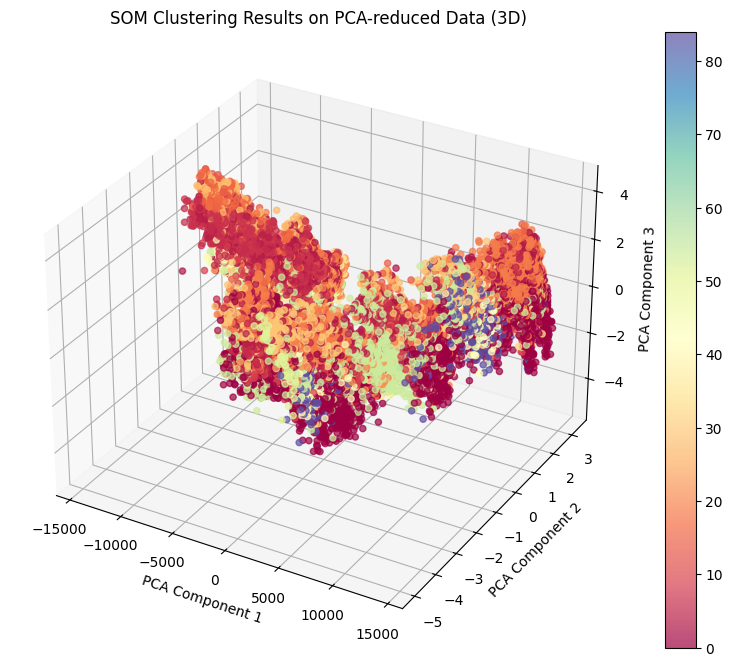

In [11]:
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ==============================
# Step 1: Apply PCA for visualization
# ==============================
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# ==============================
# Step 2: Normalize Data
# ==============================
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# ==============================
# Step 3: Initialize and Train SOM
# ==============================
som_grid_rows = 10
som_grid_cols = 10

som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=df.shape[1], sigma=1.0, learning_rate=0.5)

print("Training SOM...")
som.train_random(df_scaled, num_iteration=1000)
print("SOM training complete.")

# ==============================
# Step 4: Assign clusters
# ==============================
bmu_indices = np.array([som.winner(x) for x in df_scaled])
clusters = [r * som_grid_cols + c for r, c in bmu_indices]
df['Cluster'] = clusters

# ==============================
# Step 5: Evaluate clustering
# ==============================
silhouette = silhouette_score(df_scaled, clusters)
calinski = calinski_harabasz_score(df_scaled, clusters)
davies = davies_bouldin_score(df_scaled, clusters)

print("\nClustering Metrics (SOM):")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

print(f"\nNumber of clusters: {len(set(clusters))}")
print("\nCluster distribution:")
print(pd.Series(clusters).value_counts().sort_index())

# ==============================
# Step 6: 3D Visualization
# ==============================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], 
                     c=clusters, cmap='Spectral', alpha=0.7)

ax.set_title('SOM Clustering Results on PCA-reduced Data (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter)
plt.show()
